In [40]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import os
import datetime

In [41]:
df = pd.read_csv('Microsoft_Stock.csv')

In [42]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [61]:
df.index = df.Date
df.drop(['Date'],axis=1,inplace = True)

In [62]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [63]:
df['day'] = pd.to_datetime(df.index).dayofyear/366.0
df['year'] = pd.to_datetime(df.index).year - 2015

In [65]:
df.head()

,Open,High,Low,Close,Volume,day,year
Date,,,,,,,
4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322,0.248634,0
4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476,0.251366,0
4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692,0.262295,0
4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375,0.265027,0
4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438,0.267760,0


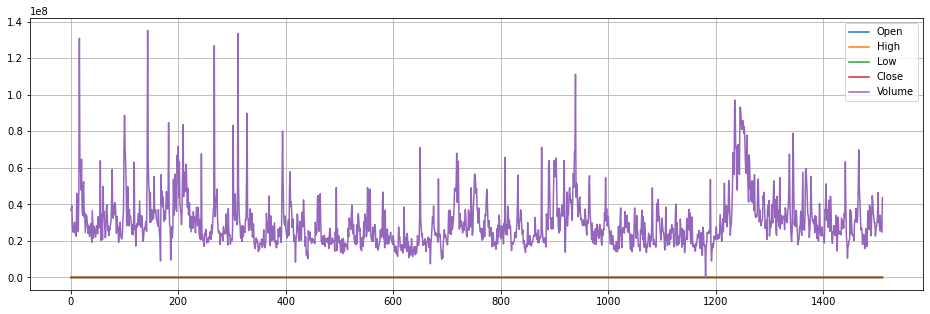

In [45]:
df.plot( figsize = (16,5))
plt.grid('On')
plt.show()

In [72]:
X = df[['day', 'year']]
y = df.Close

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
logdir = os.path.join("logs2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard( logdir, histogram_freq=1)

In [75]:
X_train.shape

(1208, 2)

In [82]:
epochs=50

Epoch 1/50
38/38 [==============================] - 2s 14ms/step - loss: 14753.7314 - mae: 107.2355 - val_loss: 14355.2109 - val_mae: 106.5286
Epoch 2/50
38/38 [==============================] - 0s 3ms/step - loss: 14570.3594 - mae: 106.4625 - val_loss: 14107.3760 - val_mae: 105.4484
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 14216.0029 - mae: 104.8748 - val_loss: 13638.6309 - val_mae: 103.2480
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 13643.2061 - mae: 102.0865 - val_loss: 12994.1357 - val_mae: 99.9716
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 12979.1387 - mae: 98.6209 - val_loss: 12354.2900 - val_mae: 96.4941
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 12392.0029 - mae: 95.3419 - val_loss: 11830.9170 - val_mae: 93.4996
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 11913.9160 - mae: 92.5536 - val_loss: 11393.6582 - val_mae: 90.9174
Epoch 8/50
3

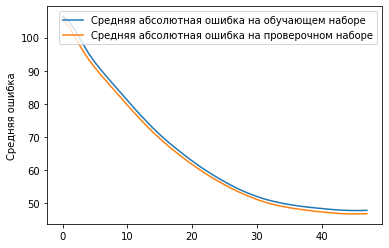

In [80]:
callbaсk = EarlyStopping(monitor='val_mae', patience=2)

model = Sequential()

model.add(LSTM(64, return_sequences="True", input_shape=(None, 1)))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=['mae'])

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[callbaсk, tensorboard_callback])


plt.plot(history.history['mae'][1:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'][1:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

#### Изменение слоёв

Epoch 1/50
38/38 [==============================] - 4s 24ms/step - loss: 14536.6553 - mae: 106.2884 - val_loss: 13410.1191 - val_mae: 102.3467
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 10854.1816 - mae: 86.0218 - val_loss: 7246.6533 - val_mae: 66.6034
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 6503.8408 - mae: 64.1305 - val_loss: 5655.6089 - val_mae: 60.4313
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 5334.9463 - mae: 57.4575 - val_loss: 4402.5684 - val_mae: 51.5288
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 3458.7937 - mae: 42.8387 - val_loss: 2279.1194 - val_mae: 35.6940
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 2249.9617 - mae: 36.2489 - val_loss: 2038.1917 - val_mae: 34.8975
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 2130.7439 - mae: 35.2374 - val_loss: 1968.5942 - val_mae: 33.9151
Epoch 8/50
38/38 [==========

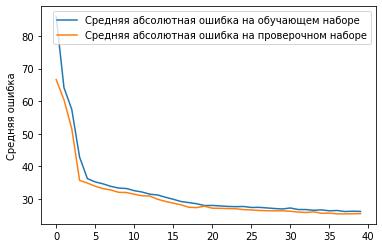

In [92]:
callbaсk = EarlyStopping(monitor='val_mae', patience=2)

model = Sequential()

model.add(LSTM(64, input_shape = (None, 1), return_sequences="True"))
model.add(LSTM(64, return_sequences="True"))
model.add(Conv1D(64, 1, activation="linear"))

model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=['mae'])

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[callbaсk, tensorboard_callback])


plt.plot(history.history['mae'][1:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'][1:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

#### Препроцессинг

In [124]:
# длина теста
valLen = 100
# длина истории для работы
xLen = 14
# отступ тестов от тренировок
bias = 10

# шаг по данным для построения обучающих примеров
step = 1

# длина прошлого 
past = xLen
p = past
# горизонт предсказания
future = 1
h=future

# параметры модели для обучения
learning_rate = 0.001
batch_size = 32

train_split = int(df.shape[0] * 0.8)

channelIndexes = [4, 5, 6]

train_data = df.iloc[0 : train_split ,channelIndexes]
val_data = df.iloc[train_split+bias:,channelIndexes]

In [125]:
train_data.head()

,Volume,day,year
Date,,,
4/1/2015 16:00:00,36865322,0.248634,0
4/2/2015 16:00:00,37487476,0.251366,0
4/6/2015 16:00:00,39223692,0.262295,0
4/7/2015 16:00:00,28809375,0.265027,0
4/8/2015 16:00:00,24753438,0.267760,0


In [126]:
Chanel_numb = len(channelIndexes)

start = xLen + future
end = start + train_split-1

xTrain_df = train_data.iloc[:-future-xLen+1,:] # сдвиг по времени для предсказания (закончить чуть раньше)
xTrain = xTrain_df[[train_data.columns[i] for i in range(Chanel_numb)]].values
yTrain = train_data.iloc[future+xLen-1:,0].values  # сдвиг по времени для предсказания (начать чуть позднее)

sequence_length = int(xLen / step)


x_end = len(val_data) - xLen - future 

label_start = len(train_data)+bias+xLen + future +1

xVal_df = val_data.iloc[:-future-xLen+1,:] # сдвиг по времени для предсказания (закончить чуть раньше)
xVal = xVal_df[[val_data.columns[i] for i in range(Chanel_numb)]].values
yVal = val_data.iloc[future+xLen-1:,0].values  # сдвиг по времени для предсказания (начать чуть позднее)

In [127]:
yTrain.shape

(1194,)

In [128]:
print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)

(1194, 3)
(1194,)
(279, 3)
(279,)


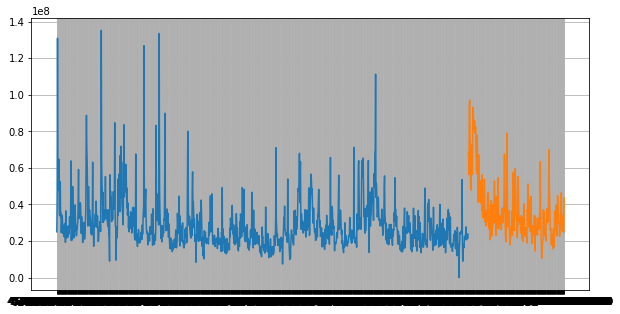

In [129]:
plt.figure(figsize=(10,5))
plt.plot(df.index[xLen:yTrain.shape[0]+xLen],yTrain[:])
plt.plot(df.index[yTrain.shape[0]+bias+future+2*xLen-1:],yVal[:])
plt.grid('on')
plt.show()

In [130]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    xTrain,
    yTrain,
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    xVal,
    yVal,
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)

In [131]:
for batch in dataset_val.take(2):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (32, 14, 3)
Target shape: (32,)


In [132]:
logdir = os.path.join("logs2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard( logdir, histogram_freq=1)

Epoch 1/50
37/37 [==============================] - 4s 34ms/step - loss: 996015935062016.0000 - mae: 28587108.0000 - val_loss: 1672012246286336.0000 - val_mae: 37309336.0000
Epoch 2/50
37/37 [==============================] - 1s 15ms/step - loss: 995928760647680.0000 - mae: 28585516.0000 - val_loss: 1671794947784704.0000 - val_mae: 37306420.0000
Epoch 3/50
37/37 [==============================] - 1s 15ms/step - loss: 995674082508800.0000 - mae: 28580968.0000 - val_loss: 1671315924713472.0000 - val_mae: 37300008.0000
Epoch 4/50
37/37 [==============================] - 1s 15ms/step - loss: 995191771103232.0000 - mae: 28572398.0000 - val_loss: 1670499209838592.0000 - val_mae: 37289064.0000
Epoch 5/50
37/37 [==============================] - 1s 14ms/step - loss: 994423777263616.0000 - mae: 28558810.0000 - val_loss: 1669270714974208.0000 - val_mae: 37272584.0000
Epoch 6/50
37/37 [==============================] - 1s 15ms/step - loss: 993315071721472.0000 - mae: 28539202.0000 - val_loss: 166

Epoch 48/50
37/37 [==============================] - 1s 17ms/step - loss: 419562839343104.0000 - mae: 15577522.0000 - val_loss: 852237542752256.0000 - val_mae: 23942304.0000
Epoch 49/50
37/37 [==============================] - 1s 15ms/step - loss: 402065847222272.0000 - mae: 15023362.0000 - val_loss: 824987250327552.0000 - val_mae: 23370094.0000
Epoch 50/50
37/37 [==============================] - 1s 15ms/step - loss: 385182834098176.0000 - mae: 14477048.0000 - val_loss: 798357379350528.0000 - val_mae: 22797160.0000


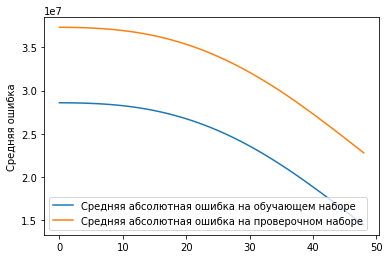

In [133]:
callbaсk = EarlyStopping(monitor='val_mae', patience=2)

model = Sequential()

model.add(LSTM(64, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences="True"))
model.add(LSTM(64, return_sequences="True")) # <None, 3,32>
model.add(Conv1D(64, 3, activation="linear")) #(None,3,64)
#model.add(Conv1D(64, 1, activation="linear"))
model.add(Flatten())                          # (None, 3*64)
model.add(Dense(3, activation="linear"))      # (None,3)

model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer="adam", metrics=['mae'])

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[callbaсk, tensorboard_callback])


plt.plot(history.history['mae'][1:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'][1:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()